In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from matplotlib.colors import ListedColormap

In [2]:
# Define directions (Up, Right, Down, Left)
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]
PHEROMONE_LIFESPAN = 10  # Pheromone influence lasts for 5 steps

# Custom colormap for visualization
cmap = ListedColormap(["black", "white", "red", "green", "blue"])

In [3]:
class Ant:
    def __init__(self, grid_size, id, color):
        self.x = random.randint(0, grid_size - 1)
        self.y = random.randint(0, grid_size - 1)
        self.direction = random.randint(0, 3)  # Random initial direction
        self.id = id  # Unique ID for the ant
        self.color = color  # Unique color assigned to the ant

    def move(self):
        dx, dy = DIRECTIONS[self.direction]
        self.x += dx
        self.y += dy

    def turn(self, clockwise=True):
        self.direction = (self.direction + (1 if clockwise else -1)) % 4

class LangtonsAntSim:
    def __init__(self, grid_size=100, pheromone_lifespan=5):
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size), dtype=int)  
        self.pheromones = np.zeros((grid_size, grid_size), dtype=int)  # Stores pheromone presence
        self.pheromone_timers = np.zeros((grid_size, grid_size), dtype=int)  # Pheromone decay timers
        
        # Two ants with distinct colors
        self.ants = [
            Ant(grid_size, 1, 2),  # Ant 1 - Blue
            Ant(grid_size, 2, 4)   # Ant 2 - Red
        ]
        
        self.pheromone_lifespan = pheromone_lifespan
    
    def step(self):
        for ant in self.ants:
            x, y = ant.x % self.grid_size, ant.y % self.grid_size
            current_pheromone = self.pheromones[x, y]
            current_color = self.grid[x, y]
            
            if current_pheromone == ant.id:
                move_straight_prob = 0.8  # Ant follows its own pheromone
            elif current_pheromone > 0:
                move_straight_prob = 0.2  # Ant encounters other ant's pheromone
            else:
                move_straight_prob = 0  # No pheromone influence
            
            if random.random() >= move_straight_prob:
                if current_color == 0:
                    ant.turn(clockwise=True)  # White square: turn right
                else:
                    ant.turn(clockwise=False)  # Black square: turn left
                
                self.grid[x, y] = 1 - current_color  # Flip the color of the square (Langton's Ant rule)
            
            # Leave new pheromone and reset timer
            self.pheromones[x, y] = ant.id
            self.pheromone_timers[x, y] = self.pheromone_lifespan
            
            # Move forward
            ant.move()
        
        # Decay pheromones over time
        self.pheromone_timers[self.pheromone_timers > 0] -= 1
        self.pheromones[self.pheromone_timers == 0] = 0  # Remove expired pheromones
        
    def update_frame(self, steps=10000, fps=50):
        plt.figure(figsize=(6, 6))
        interval = 1 / fps
        for _ in range(steps):
            self.step()
            
            if _ % fps == 0:  # Update visualization periodically
                plt.clf()
                combined_grid = np.copy(self.grid)
                
                # Draw ants in their respective colors
                for ant in self.ants:
                    combined_grid[ant.x % self.grid_size, ant.y % self.grid_size] = ant.color
                
                # Mark pheromones on the grid (green)
                for i in range(self.grid_size):
                    for j in range(self.grid_size):
                        if self.pheromones[i, j] > 0:
                            combined_grid[i, j] = 3
                
                plt.imshow(combined_grid.T, cmap=cmap, origin='lower')
                plt.title(f"Langton's Ant with Pheromones - Step {_}")
                plt.pause(interval)
        
        plt.show()

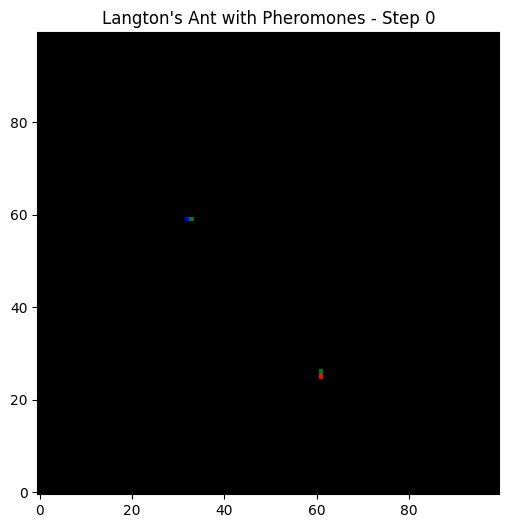

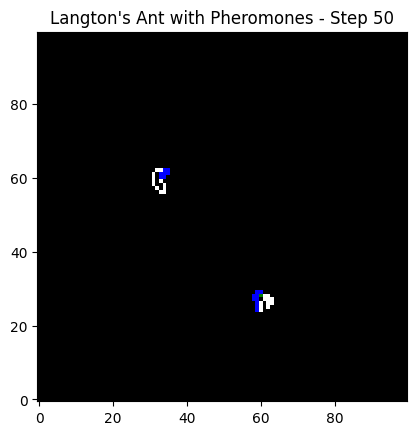

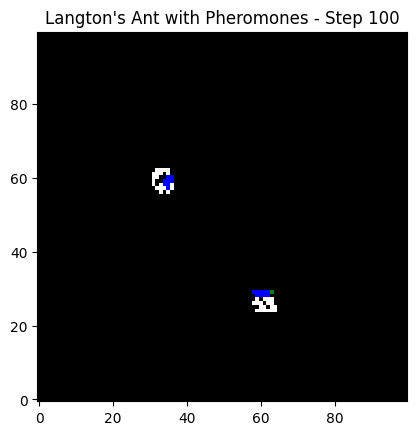

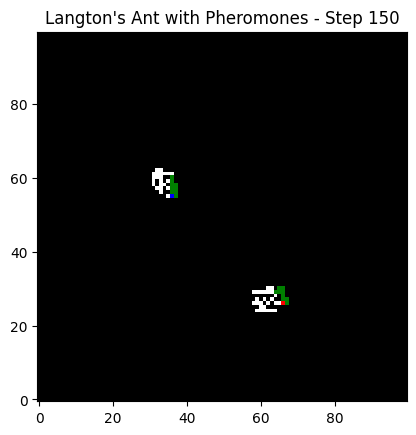

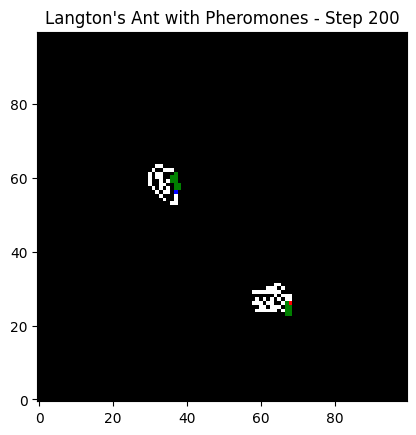

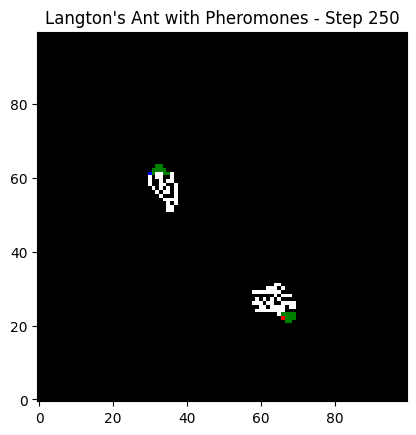

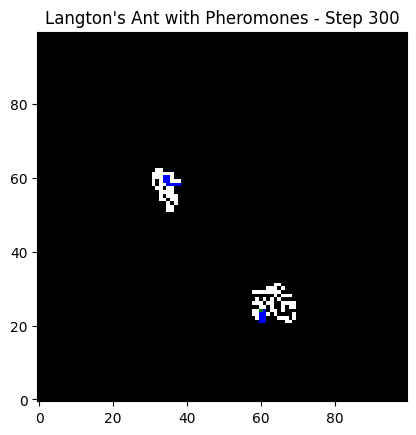

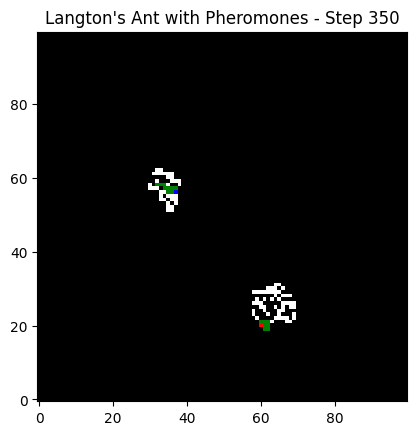

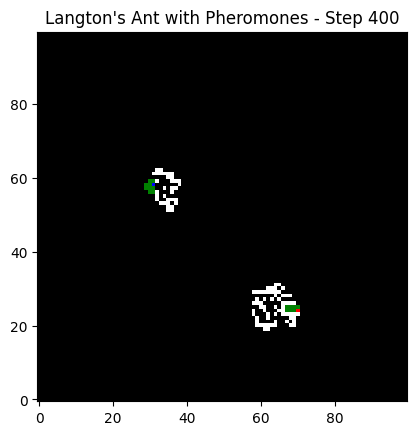

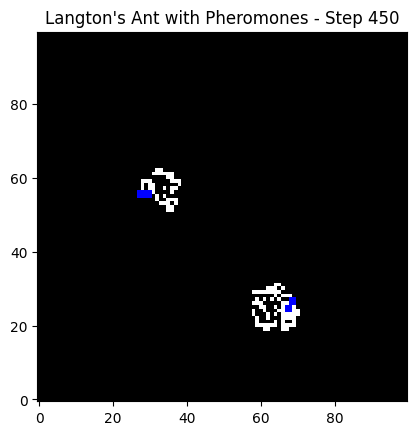

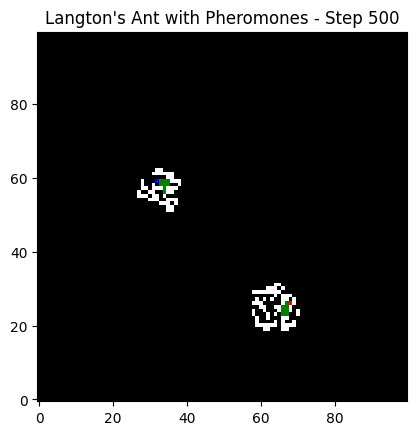

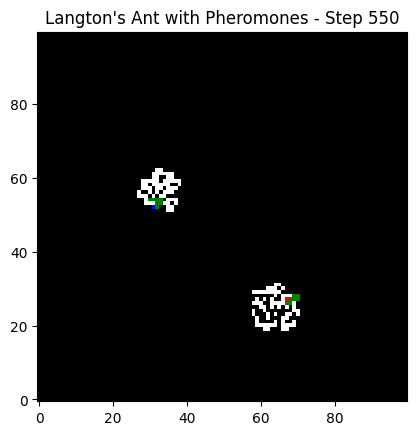

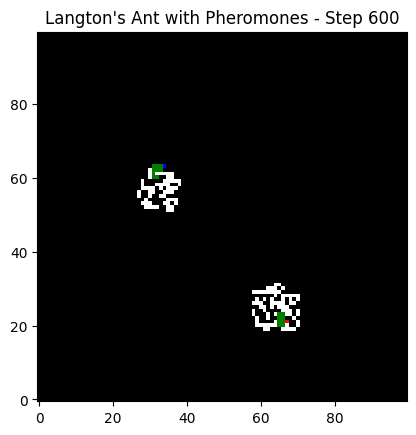

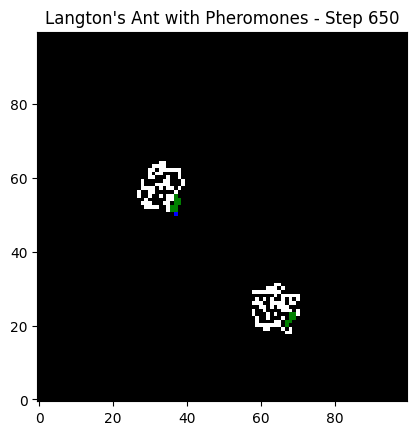

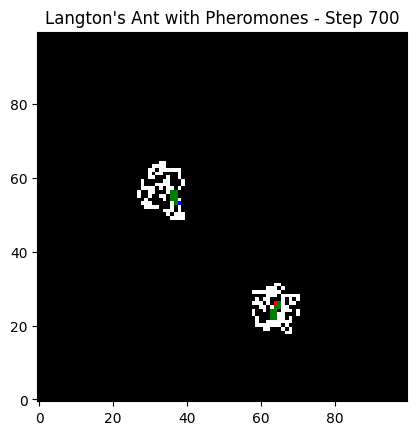

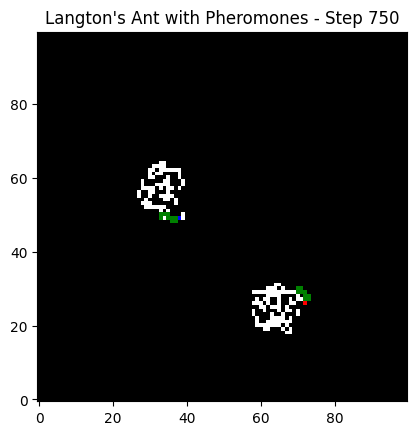

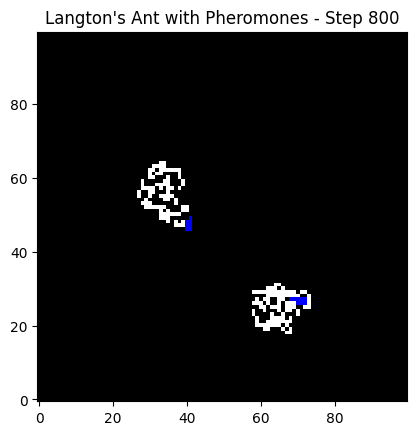

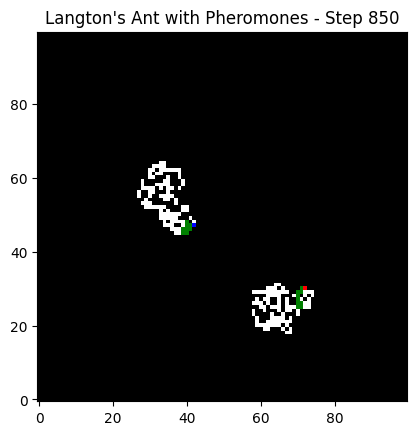

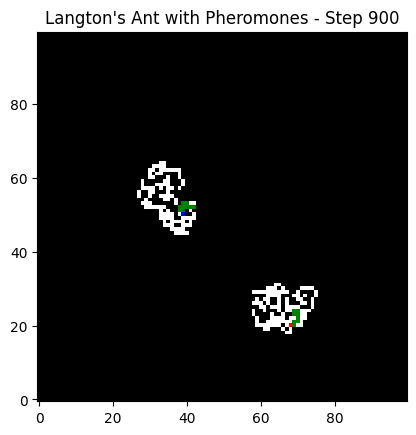

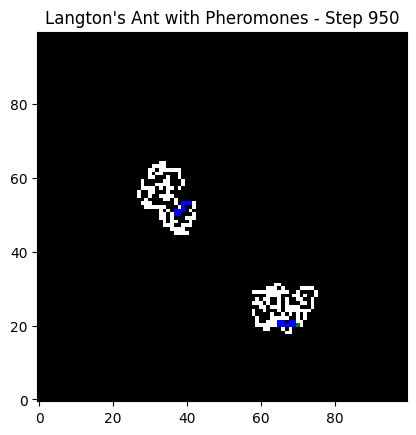

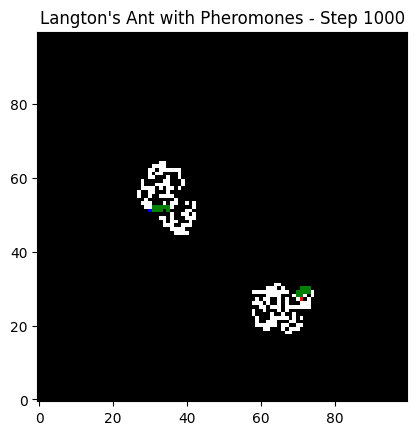

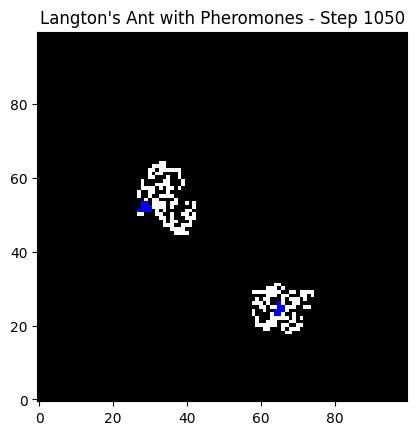

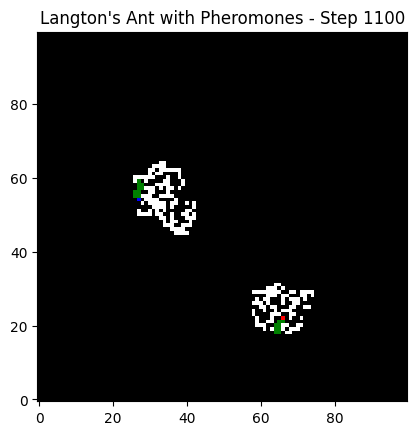

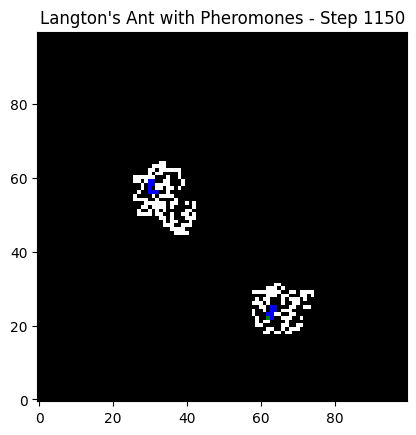

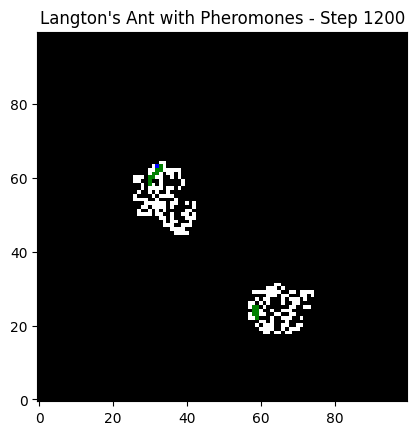

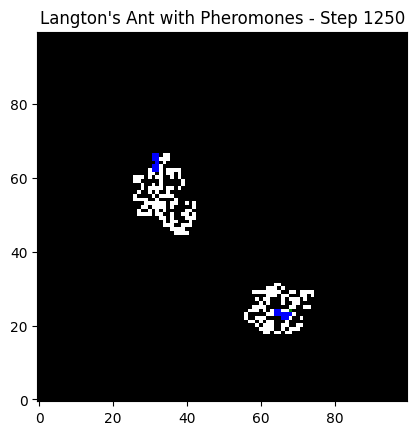

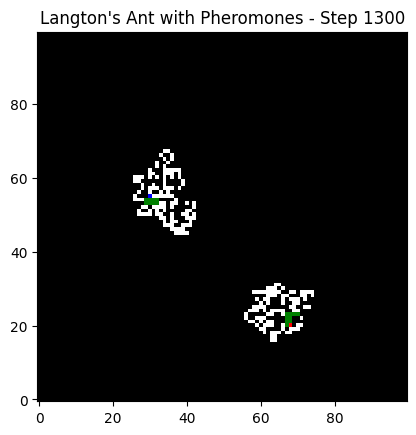

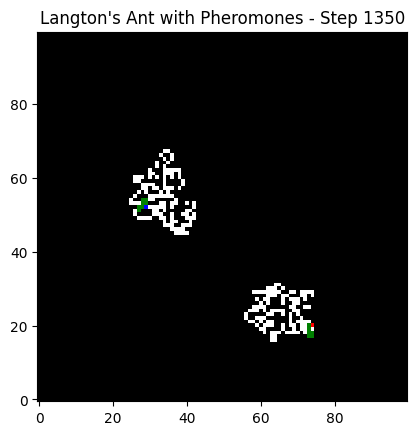

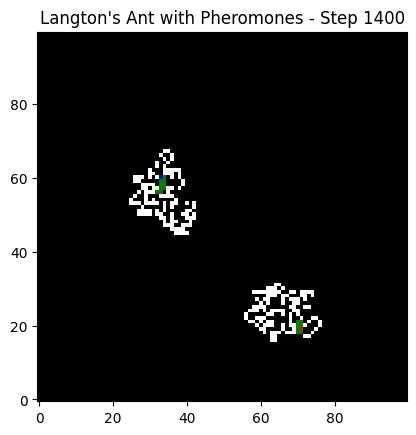

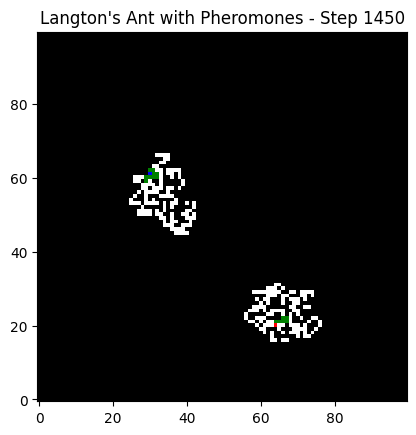

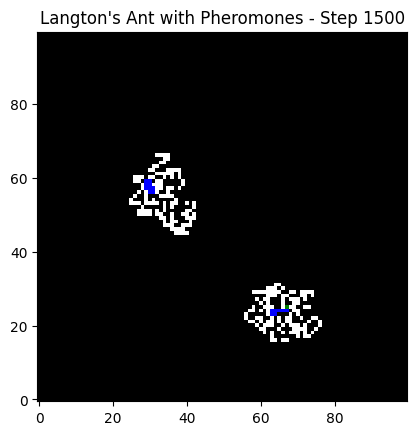

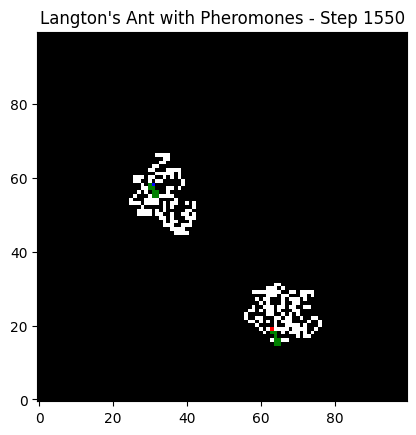

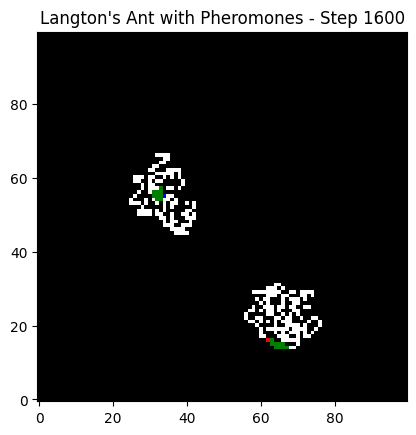

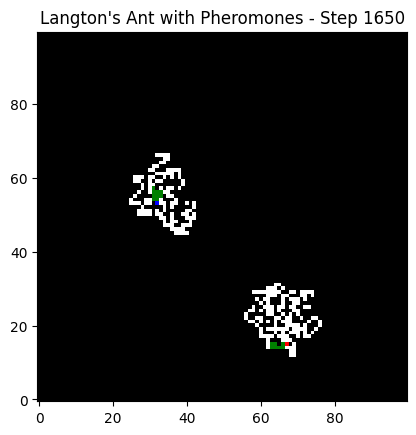

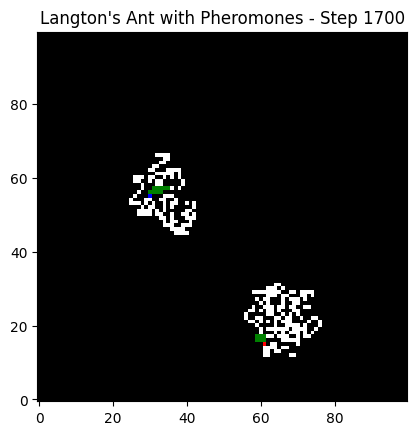

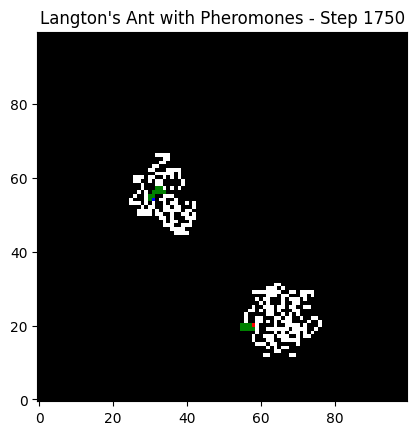

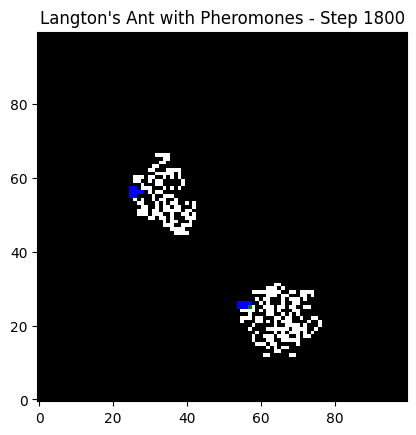

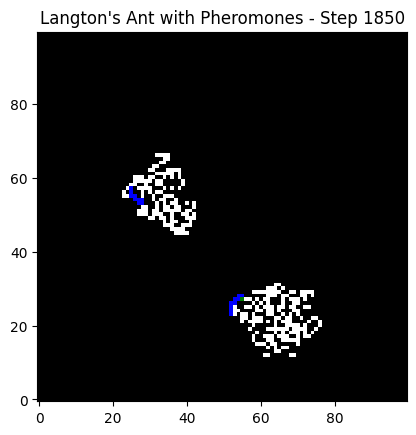

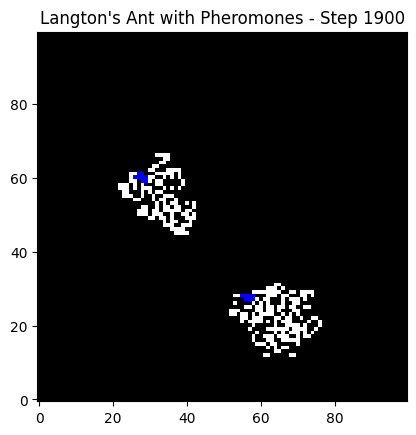

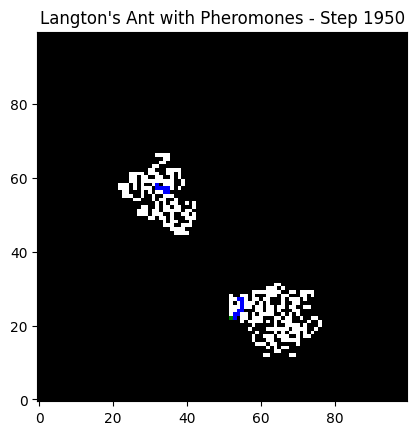

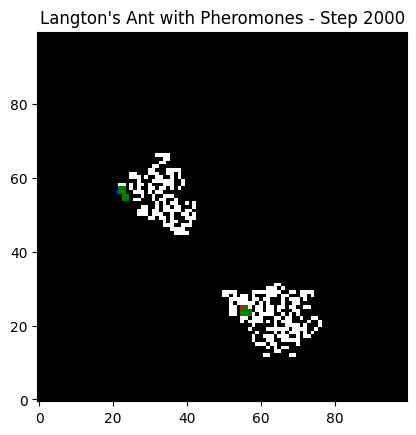

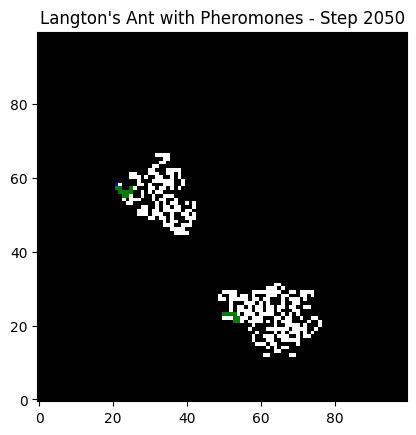

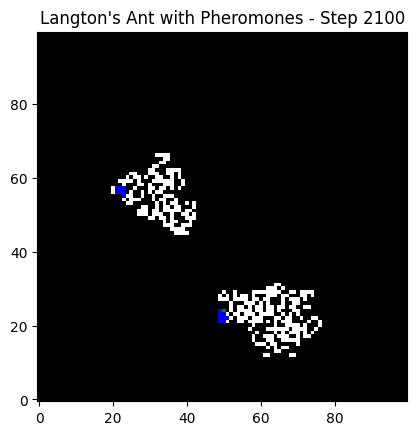

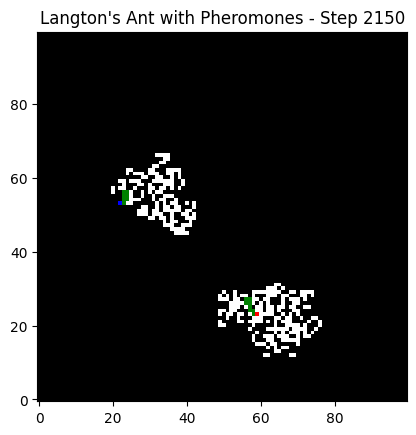

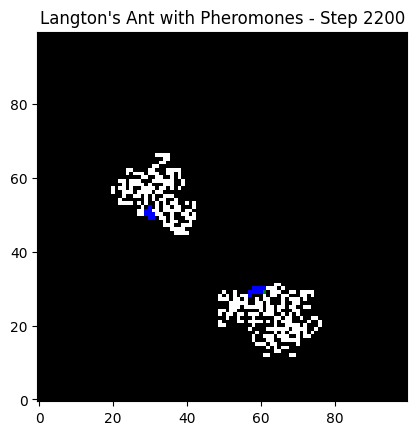

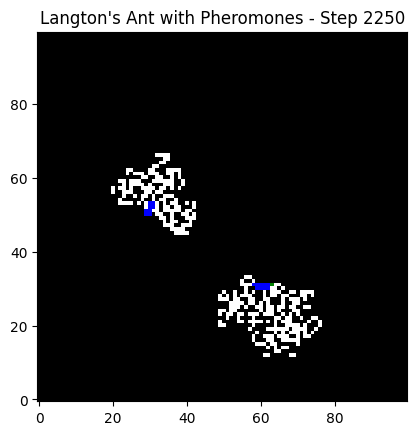

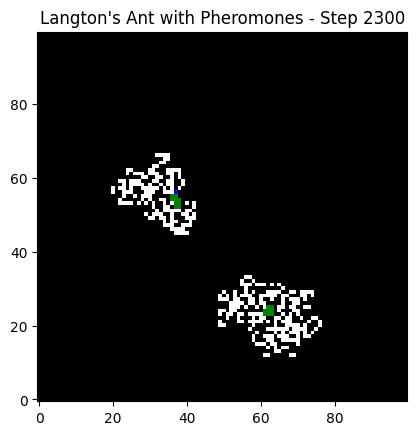

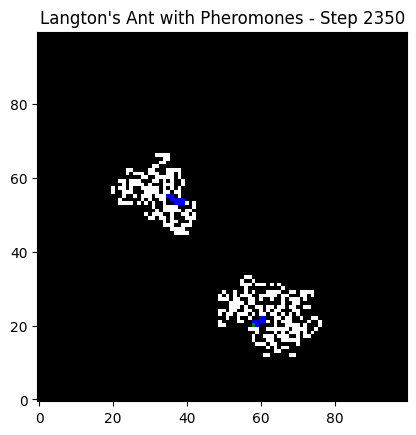

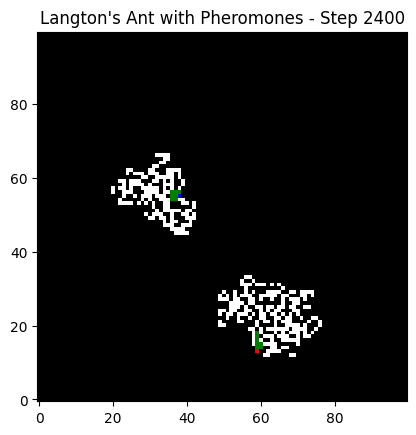

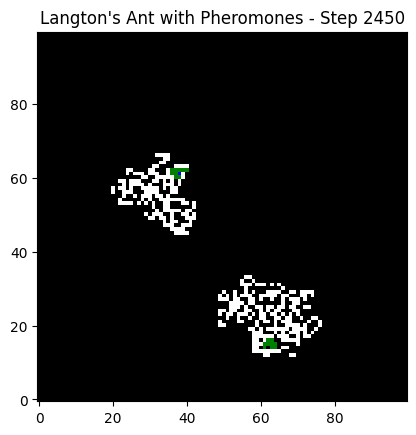

KeyboardInterrupt: 

In [4]:
if __name__ == "__main__":
    sim = LangtonsAntSim(grid_size=100, pheromone_lifespan=10)
    sim.update_frame(steps=10000, fps=50)